<a href="https://colab.research.google.com/github/carloscailao/CSMODEL/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📄 Abstract

This notebook is prepared in partial fulfillment of the **Statistical Modeling and Simulation (CSMODEL)** course under the **College of Computer Studies (CCS)** of **De La Salle University – Manila**.

The research team, **Statisteros Modeleros**, is composed of three undergraduate students from the **Bachelor of Science in Computer Science** program. This project investigates real-world patterns in the **film industry from 1990 to 2025**, in correlation with the **rise of social media platforms** during the same period.

Motivated by the rising belief that global attention spans are shrinking due to the emergence of short-form content such as **TikToks, Instagram Reels, and YouTube Shorts**, this study explores whether the **movie industry has responded or adapted** to these shifting media consumption habits.

### 👥 Researchers

<table>
<tr>
<td>

**Carlos Luis B. Cailao**  
_2nd Year, BS Computer Science – Software Technology_  
📧 carlos_cailao@dlsu.edu.ph  

**Andre Gabriel D. Llanes**  
_2nd Year, BS Computer Science – Software Technology_  
📧 andre_llanes@dlsu.edu.ph  

**Sophia Pauline V. Sena**  
_2nd Year, BS Computer Science – Network and Information Security_  
📧 sophia_sena@dlsu.edu.ph  

</td>
<td align="right" style="text-align: right; vertical-align: top;">

<strong>Statisteros Modeleros</strong><br>  
<img src="https://raw.githubusercontent.com/carloscailao/CSMODEL/main/assets/StatisterosModeleros_Logo.png" alt="Statisteros Modeleros Logo" width="150"><br>  
<sub><i>Logo generated using ChatGPT</i></sub>

</td>
</tr>
</table>

---

# 📊 About the Datasets

## 🎬 TMDB Movies Dataset (Filtered Version)

This dataset is a curated subset of the full TMDB (The Movie Database) dataset available on Kaggle, which originally contained around 1 million movie entries. To ensure higher data quality and relevance, only movies with **1,000 or more votes** were retained, resulting in a filtered dataset of **3,940 movies**.

Each row represents a single movie, with attributes describing its content, popularity, and metadata. Below is the description of each column:

### Column Descriptions

| Column Name            | Description on Kaggle |
|------------------------|-------------|
| `id`                   | Unique identifier for each movie. (type: int) |
| `title`                | Title of the movie. (type: str) |
| `vote_average`         | Average vote or rating given by viewers. (type: float) |
| `vote_count`           | Total count of votes received for the movie. (type: int) |
| `status`               | The status of the movie (e.g., Released, Rumored, Post Production, etc.). (type: str) |
| `release_date`         | Date when the movie was released. (type: str) |
| `revenue`              | Total revenue generated by the movie. (type: int) |
| `runtime`              | Duration of the movie in minutes. (type: int) |
| `adult`                | Indicates if the movie is suitable only for adult audiences. (type: bool) |
| `backdrop_path`        | URL of the backdrop image for the movie. (type: str) |
| `budget`               | Budget allocated for the movie. (type: int) |
| `homepage`             | Official homepage URL of the movie. (type: str) |
| `imdb_id`              | IMDb ID of the movie. (type: str) |
| `original_language`    | Original language in which the movie was produced. (type: str) |
| `original_title`       | Original title of the movie. (type: str) |
| `overview`             | Brief description or summary of the movie. (type: str) |
| `popularity`           | Popularity score of the movie. (type: float) |
| `poster_path`          | URL of the movie poster image. (type: str) |
| `tagline`              | Catchphrase or memorable line associated with the movie. (type: str) |
| `genres`               | List of genres the movie belongs to. (type: str) |
| `production_companies` | List of production companies involved in the movie. (type: str) |
| `production_countries` | List of countries involved in the movie production. (type: str) |
| `spoken_languages`     | List of languages spoken in the movie. (type: str) |
| `keywords`             | Keywords associated with the movie. Do `.split(", ")` to convert to a list. (type: str) |

### Source
- **Dataset**: [TMDB Movies Dataset](https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies?fbclid=IwY2xjawK7Og1leHRuA2FlbQIxMQABHlArG7Tyo1mSlbbwmYbOZ068LWVINqSO5yVICdjNNztmY--1a57isPs8cuts_aem_nJypZ3sxgaGXGtVjc-kKLA)
- **API Reference**: [TMDB API](https://developer.themoviedb.org/)
- **License**: Public use as per TMDB terms

### Filtering Criteria Applied

To ensure relevance and engagement, the original dataset of approximately **1 million movies** was filtered to include only those with **at least 1,000 votes**, resulting in a reduced dataset of **3,940 movies**.

This filtering threshold was chosen to:
- Focus the analysis on **mainstream films** with significant audience interaction.
- **Exclude obscure or niche titles** that may have artificially skewed ratings due to low sample size.
- Remove **recently released movies** that have not yet accumulated enough user votes to yield statistically meaningful trends.

While the threshold of 1,000 votes is not statistically derived, it serves as a **pragmatic cutoff** to balance data volume and analytical reliability.

This filtering approach also aligns with the design of the **Social Media Dataset**, which features only the **top 10 platforms per month** based on Monthly Active Users (MAU). By focusing on the most engaged and visible entries in both datasets, the analysis ensures a consistent emphasis on **mainstream trends and public attention** across both film and social media platforms.

### How the Data Was Collected

The Movie Database (TMDB) collects its data **directly from its registered users**. All metadata, ratings, and vote counts are **crowdsourced within the TMDB ecosystem**, and **no external review aggregators or platforms** (e.g., IMDb, Rotten Tomatoes) are used as data sources.

### Potential Implications and Biases

- **Platform-specific bias**: Since the data is user-generated, the ratings and vote counts may reflect the **demographics, preferences, and activity patterns** of TMDB’s userbase rather than the general public.
- **Temporal bias**: Older films — especially those released **before TMDB's launch in 2008** — may have **lower visibility and engagement**, simply because they were not rated or reviewed by users retroactively.
- **Pop culture skew**: Films that are trending, meme-worthy, or culturally viral at a specific point in time may accumulate disproportionately high votes.
- **Language and regional skew**: TMDB's userbase may overrepresent certain **regions, languages, or genres**, affecting vote distributions.

These factors should be considered when interpreting vote counts, average ratings, and other user-generated metrics. The dataset still offers valuable insight into **contemporary global media engagement**, but with awareness of its **source-driven limitations**.


## 📱 Social Media Dataset (Manually Constructed)

This dataset was manually compiled by the research group based on an interactive visualization from **Statistics and Data**. It tracks the **Global Top 10 Social Media Platforms** by **Monthly Active Users (MAU)** over time from February 2004 to January 2025.

Since the source did not offer a downloadable file, the dataset was recreated and saved as a CSV for analysis.

### Dataset Overview

- **Time Period**: February 2004 to January 2025  
- **Total Entries**: 2,425 rows  
- **Duration Covered**: 252 months  
- **Observation Frequency**: Monthly  
- **Data Type**: Tabular (CSV)

### Column Descriptions

| Column Name         | Description |
|---------------------|-------------|
| `year_month`              | The year and month of the observation (e.g. 2004_02) |
| `platform`          | Name of the social media platform (e.g., Facebook, TikTok) |
| `mau` | Number of active users (typically in millions or billions) for that month |
| `rank`              | Rank of the platform for that particular month based on MAU |

### Source
- **Interactive Chart**: [Statistics and Data – Most Popular Social Media (2004–2025)](https://statisticsanddata.org/data/most-popular-social-media-2004-2025/?fbclid=IwY2xjawK7OolleHRuA2FlbQIxMQABHlLb727mru341vsUF6i4K2_suxcTzDdB0tJDLk_xLoc0Ifb4_PRylDYjOiNK_aem_Na3LzkWUyR_4eRbxyhf7-w#google_vignette)
- **Data Format**: CSV (manually constructed by the research group)


### How the Data Was Collected

According to the source website, the data visualized in the interactive chart was derived from multiple reputable databases, including **Eurostat, OECD, World Bank Open Data, and Data.gov**, among others:

> *“For the articles and videos I use different databases, such as Eurostat, OECD, World Bank Open Data, Data Gov and others…”*

Since no downloadable dataset was provided, the researchers **manually transcribed** the data from the chart. During this process, **validation checks** were performed to ensure the values matched the original visualization and remained **reasonably realistic** within the monthly context.

Although this introduces a degree of manual subjectivity, the use of **cross-referenced data sources** and **careful transcription** reinforces the dataset’s **credibility** and **accuracy** for time series analysis.


### Note on Accessibility

The team attempted to contact the dataset owner via **email**, **Facebook Messenger**, and **Instagram**, but received **no response** as of the time this notebook was written (06/23/2025).

### Potential Implications

Because the dataset was **manually constructed**, there is an inherent risk of **human error** during data entry, such as typographical mistakes, incorrect timestamps, or omitted values.

Additionally, despite efforts to reach out, the researchers were **unable to establish direct contact with the original source**. As a result, certain data points may lack contextual explanation, and **some values could be incomplete or imprecise** without the opportunity for clarification or official verification.

While every effort was made to ensure the dataset is accurate and representative, these limitations should be considered when interpreting the results or drawing conclusions from the data.

## 📦 Import the datasets here:

In [1]:
import pandas as pd

# Url of dataset copies as of 06/15/2025 uploaded in GitHub
moviesDatasetRaw = "https://raw.githubusercontent.com/carloscailao/CSMODEL/main/data/Movies_Dataset_TMDB.csv"
socialMediaDatasetRaw = "https://raw.githubusercontent.com/carloscailao/CSMODEL/main/data/Social_Media_Dataset_Top_10_Social_Media_2004-2025.csv"

# Creation of dataframes from CSV files of datasets
moviesDf = pd.read_csv(moviesDatasetRaw)
socialMediaDf = pd.read_csv(socialMediaDatasetRaw)

# 🧼Data Cleaning
- This section handles cleaning, dataframing, and prior preparations on the Movies and Social Media Datasets for Exploratory Data Analysis.
- This also details how *socialMediaDf and moviesDf* turn into ***cleanedSocialMediaDf and cleanedMoviesDf*** respectively.

## 📱Social Media Dataset Cleaning
- Since this CSV was manually inputted, the researchers have to make sure that manual errors are handled and the dataframe is cleaned in terms of data typing and input formatting.

Info on the **original, uncleaned** dataset
- Here, we see that year_month and mau are of data type **object**, when we would prefer year_month to be dates, and mau to be integers, for easier plotting in the modeling.

In [2]:
socialMediaDf.info()
socialMediaDf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425 entries, 0 to 2424
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year_month  2425 non-null   object
 1   platform    2425 non-null   object
 2   mau         2425 non-null   object
 3   rank        2425 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 75.9+ KB


,year_month,platform,mau,rank
0,2004_02,Friendster,"4,500,000",1
1,2004_02,Orkut,500000,2
2,2004_02,MySpace,370000,3
3,2004_03,Friendster,"5,241,578",1
4,2004_03,Orkut,"1,685,648",2


### 1. Cleaning MAU entries

- From object data type, **to integer**
- Omitting commas e.g. 4,500,000 to 4500000

In [3]:
# Make a copy of the original Social Media Dataframe for cleaning
cleanedSocialMediaDf = socialMediaDf.copy()

# Remove commas and convert MAU to integer
cleanedSocialMediaDf['mau'] = cleanedSocialMediaDf['mau'].str.replace(',', '', regex=False).astype(int)

cleanedSocialMediaDf['mau'].head()

0    4500000
1     500000
2     370000
3    5241578
4    1685648
Name: mau, dtype: int64

### 2. Cleaning year_month entries
- From object data type to **datetime64**
- Conversion of manually inputted year_month to proper format

In [4]:
# Replace date underscores with dashes
cleanedSocialMediaDf['year_month'] = cleanedSocialMediaDf['year_month'].str.replace('_', '-', regex=False)

# Convert to datetime
cleanedSocialMediaDf['year_month'] = pd.to_datetime(cleanedSocialMediaDf['year_month'], format='%Y-%m')

cleanedSocialMediaDf['year_month'].head()

0   2004-02-01
1   2004-02-01
2   2004-02-01
3   2004-03-01
4   2004-03-01
Name: year_month, dtype: datetime64[ns]

### 3. Cleaning platform entries

In [5]:
cleanedSocialMediaDf['platform'].unique()

array(['Friendster', 'Orkut', 'MySpace', 'Flickr', 'Facebook', 'Hi5',
       'Flicker', 'Youtube', 'Reddit', 'Orkut ', 'Twitter/X', 'Tumblr',
       'QZone', 'Weibo', 'Myspace', 'Whatsapp', 'Wechat', 'Google+',
       'Instagram', 'TIkTok', 'TikTok', 'Telegram', 'Snapchat'],
      dtype=object)

We see **four** issues during manual inputting:
- **Flickr** appears as both "Flickr" and "Flicker".
- **TikTok** appears as both "TikTok" and "TIkTok".
- **MySpace** appears as both "MySpace" and "Myspace".
- **Orkut** has a trailing space ("Orkut ").


In [6]:
# Replace known typos and inconsistencies
cleanedSocialMediaDf['platform'] = cleanedSocialMediaDf['platform'].replace({
    'Flicker': 'Flickr',
    'TIkTok': 'TikTok',
    'Myspace': 'MySpace',
    'Orkut ': 'Orkut'  # trailing space
})

print(sorted(cleanedSocialMediaDf['platform'].unique()))

['Facebook', 'Flickr', 'Friendster', 'Google+', 'Hi5', 'Instagram', 'MySpace', 'Orkut', 'QZone', 'Reddit', 'Snapchat', 'Telegram', 'TikTok', 'Tumblr', 'Twitter/X', 'Wechat', 'Weibo', 'Whatsapp', 'Youtube']


Now that we have cleaned all the columns in the Social Media Dataframe, we shall use ***cleanedSocialMediaDf*** going forward.

In [7]:
cleanedSocialMediaDf.info()
cleanedSocialMediaDf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425 entries, 0 to 2424
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year_month  2425 non-null   datetime64[ns]
 1   platform    2425 non-null   object        
 2   mau         2425 non-null   int64         
 3   rank        2425 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 75.9+ KB


,year_month,platform,mau,rank
0,2004-02-01,Friendster,4500000,1
1,2004-02-01,Orkut,500000,2
2,2004-02-01,MySpace,370000,3
3,2004-03-01,Friendster,5241578,1
4,2004-03-01,Orkut,1685648,2


## 🎬Movies Dataset Cleaning

 Information about the original, uncleaned movie dataset.

- We can see here that the release_date is an object, when we prefer release_date to be of date data type

- homepage, tagline, production_companies, production_countries, spoken_languages, and keywords contain null value entries

In [8]:
moviesDf.info()
moviesDf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3940 non-null   int64  
 1   title                 3940 non-null   object 
 2   vote_average          3940 non-null   float64
 3   vote_count            3940 non-null   int64  
 4   status                3940 non-null   object 
 5   release_date          3940 non-null   object 
 6   revenue               3940 non-null   int64  
 7   runtime               3940 non-null   int64  
 8   adult                 3940 non-null   bool   
 9   backdrop_path         3940 non-null   object 
 10  budget                3940 non-null   int64  
 11  homepage              2186 non-null   object 
 12  imdb_id               3940 non-null   object 
 13  original_language     3940 non-null   object 
 14  original_title        3940 non-null   object 
 15  overview             

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,15/07/2010,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,05/11/2014,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,16/07/2008,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,15/12/2009,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,25/04/2012,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


Let's first make a copy of the movie dataset for cleaning

In [9]:
cleanedMoviesDf = moviesDf.copy()

### 1. Cleaning release_date entries

We will follow the yyyy-mm-dd date format and convert the release_date column from an object to a datetime data type.

In [10]:
cleanedMoviesDf['release_date'] = cleanedMoviesDf['release_date'].str.replace('/', '-', regex=False)
cleanedMoviesDf['release_date'].head()

0    15-07-2010
1    05-11-2014
2    16-07-2008
3    15-12-2009
4    25-04-2012
Name: release_date, dtype: object

In [11]:
cleanedMoviesDf['release_date'] = pd.to_datetime(cleanedMoviesDf['release_date'], format='%d-%m-%Y')
cleanedMoviesDf['release_date'].head()

0   2010-07-15
1   2014-11-05
2   2008-07-16
3   2009-12-15
4   2012-04-25
Name: release_date, dtype: datetime64[ns]

The next step is to clean the columns with null values: homepage, tagline, production_companies, production_countries, spoken_languages, and keywords. 

### 2. Cleaning homepage entries

The 'homepage' column in the data frame serves simply as a link redirecting to the movie's site. 

In [12]:
# Number of null entries in 'homepage'
print(cleanedMoviesDf[cleanedMoviesDf['homepage'].isna()].shape[0])

1754


The homepage variable has no relevance to the data we need. But to avoid confusion and for better practice, we'll replace null entries with N/A

In [13]:
# Replace null entries in 'homepage' with 'N/A'
cleanedMoviesDf['homepage'].fillna('N/A', inplace=True)
print(cleanedMoviesDf[cleanedMoviesDf['homepage'].isna()].shape[0])

0


### 3. Cleaning tagline entries

The 'tagline' variable is a short and catchy slogan used to promote the movie. 

In [14]:
# Number of null entries in 'homepage'
print(cleanedMoviesDf[cleanedMoviesDf['tagline'].isna()].shape[0])

287


287 null entries cannot simply be dropped, additionally, we will be using 'tagline' for a corpus analysis later on. We replace null entries with 'N/A', as replacing nulls with a substitute token ensures compatibility with tokenizers and embedding models for NLP pipelines.

In [15]:
# Replace null entries in 'tagline' with 'N/A'
cleanedMoviesDf['tagline'].fillna('N/A', inplace=True)
print(cleanedMoviesDf[cleanedMoviesDf['tagline'].isna()].shape[0])

0


### 4. Cleaning production_companies entries

Company that produced the movie. There are five null entries in 'production_companies'. The team decided to research the production companies and manually replace the null entries.

In [16]:
# Print all titles of movies with null entries in 'production_companies'
print(cleanedMoviesDf[cleanedMoviesDf['production_companies'].isna()][['title', 'production_companies']])

                                    title production_companies
3136  Wizards of Waverly Place: The Movie                  NaN
3202                       The Open House                  NaN
3513                     Un Chien Andalou                  NaN
3582                           Starstruck                  NaN
3783         Naomi and Ely's No Kiss List                  NaN


Wizards of Waverly Place: The Movie - It's a Laugh Productions https://www.imdb.com/title/tt1369845/

In [17]:
# Replace null entry in 'production_companies' column for row 3136
cleanedMoviesDf.loc[3136, 'production_companies'] = "It's a Laugh Productions"

# Print both 'production_companies' and 'title' for row 3136
print(f"Production Companies: {cleanedMoviesDf.loc[3136, 'production_companies']}, Title: {cleanedMoviesDf.loc[3136, 'title']}")

Production Companies: It's a Laugh Productions, Title: Wizards of Waverly Place: The Movie


The Open House - Suzane Coote, Matt Angel https://www.imdb.com/title/tt7608028/reviews/ 

In [18]:
# Replace null entry in 'production_companies' column for row 3202
cleanedMoviesDf.loc[3202, 'production_companies'] = 'Suzane Coote, Matt Angel'

# Print both 'production_companies' and 'title' for row 3202
print(f"Production Companies: {cleanedMoviesDf.loc[3202, 'production_companies']}, Title: {cleanedMoviesDf.loc[3202, 'title']}")

Production Companies: Suzane Coote, Matt Angel, Title: The Open House


Un Chien Andalou - Luis Buñuel and Salvador Dalí https://www.imdb.com/title/tt0020530/

In [19]:
# Replace null entry in 'production_companies' column for row 3513
cleanedMoviesDf.loc[3513, 'production_companies'] = 'Luis Buñuel and Salvador Dalí'

# Print both 'production_companies' and 'title' for row 3513
print(f"Production Companies: {cleanedMoviesDf.loc[3513, 'production_companies']}, Title: {cleanedMoviesDf.loc[3513, 'title']}")

Production Companies: Luis Buñuel and Salvador Dalí, Title: Un Chien Andalou


Starstruck - Disney Channel https://www.imdb.com/title/tt1579247/

In [20]:
# Replace null entry in 'production_companies' column for row 3582
cleanedMoviesDf.loc[3582, 'production_companies'] = 'Disney Channel'

# Print both 'production_companies' and 'title' for row 3582
print(f"Production Companies: {cleanedMoviesDf.loc[3582, 'production_companies']}, Title: {cleanedMoviesDf.loc[3582, 'title']}")

Production Companies: Disney Channel, Title: Starstruck


Naomi and Ely's No Kiss List - One Two films https://en.wikipedia.org/wiki/Naomi_and_Ely%27s_No_Kiss_List

In [21]:
# Replace null entry in 'production_companies' column for row 3783
cleanedMoviesDf.loc[3783, 'production_companies'] = 'One Two films'

# Print both 'production_companies' and 'title' for row 3783
print(f"Production Companies: {cleanedMoviesDf.loc[3783, 'production_companies']}, Title: {cleanedMoviesDf.loc[3783, 'title']}")

Production Companies: One Two films, Title: Naomi and Ely's No Kiss List


In [22]:
# Checks for null entries in 'product_companies" column
null_count = cleanedMoviesDf['production_companies'].isna().sum()

# Print the result
print(f"Total number of null values in 'production_companies': {null_count}")

Total number of null values in 'production_companies': 0


### 5. Cleaning production_countries entries

Column 'production_countries' is the list of countries involved in the movie production. This column has 2 null entries. We shall manually input the appropriate values once more.

In [23]:
print(cleanedMoviesDf[cleanedMoviesDf['production_countries'].isna()][['title', 'release_date', 'production_countries']])

                           title release_date production_countries
813                         Salt   2010-07-21                  NaN
2833  Gabriel's Inferno: Part II   2020-07-31                  NaN


Salt - United States of America, Russia https://www.imdb.com/title/tt0944835/locations/?ref_=tt_dt_loc

In [24]:
# Replace null entry in 'production_countries' column for row 813
cleanedMoviesDf.loc[813, 'production_countries'] = 'United States of America, Russia'

# Print both 'production_countries' and 'title' for row 813
print(f"Production Countries: {cleanedMoviesDf.loc[813, 'production_countries']}, Title: {cleanedMoviesDf.loc[813, 'title']}")

Production Countries: United States of America, Russia, Title: Salt


Gabriel's Inferno: Part II - United States of America https://www.imdb.com/title/tt0944835/locations/?ref_=tt_dt_loc

In [25]:
# Replace null entry in 'production_countries' column for row 2833
cleanedMoviesDf.loc[2833, 'production_countries'] = 'United States of America'

# Print both 'production_countries' and 'title' for row 2833
print(f"Production Countries: {cleanedMoviesDf.loc[2833, 'production_countries']}, Title: {cleanedMoviesDf.loc[2833, 'title']}")

Production Countries: United States of America, Title: Gabriel's Inferno: Part II


In [26]:
# Checks for null entries in 'production_countries" column
null_count = cleanedMoviesDf['production_countries'].isna().sum()

# Print the result
print(f"Total number of null values in 'production_countries': {null_count}")

Total number of null values in 'production_countries': 0


### 6. Cleaning spoken_languages entries

List of languages spoken in the movie. Since we have three null entries, we shall manually place the appropriate values once again.

In [27]:
print(cleanedMoviesDf[cleanedMoviesDf['spoken_languages'].isna()][['title', 'release_date', 'spoken_languages']])

                           title release_date spoken_languages
1827    Shazam! Fury of the Gods   2023-03-15              NaN
2833  Gabriel's Inferno: Part II   2020-07-31              NaN
3111             West Side Story   2021-12-08              NaN


Shazam! Fury of the Gods - English https://www.imdb.com/title/tt10151854/

In [28]:
# Replace null entry in 'spoken_languages' column for row 1827
cleanedMoviesDf.loc[1827, 'spoken_languages'] = 'English'

# Print both 'spoken_languages' and 'title' for row 1827
print(f"Spoken Languages: {cleanedMoviesDf.loc[1827, 'spoken_languages']}, Title: {cleanedMoviesDf.loc[1827, 'title']}")

Spoken Languages: English, Title: Shazam! Fury of the Gods


Gabriel's Inferno: Part II - English https://www.imdb.com/title/tt10151854/

In [29]:
# Replace null entry in 'spoken_languages' column for row 2833
cleanedMoviesDf.loc[2833, 'spoken_languages'] = 'English'

# Print both 'spoken_languages' and 'title' for row 2833
print(f"Spoken Languages: {cleanedMoviesDf.loc[2833, 'spoken_languages']}, Title: {cleanedMoviesDf.loc[2833, 'title']}")

Spoken Languages: English, Title: Gabriel's Inferno: Part II


West Side Story - English, Spanish https://www.imdb.com/title/tt3581652/

In [30]:
# Replace null entry in 'spoken_languages' column for row 3111
cleanedMoviesDf.loc[3111, 'spoken_languages'] = 'English, Spanish'

# Print both 'spoken_languages' and 'title' for row 3111
print(f"Spoken Languages: {cleanedMoviesDf.loc[3111, 'spoken_languages']}, Title: {cleanedMoviesDf.loc[3111, 'title']}")

Spoken Languages: English, Spanish, Title: West Side Story


### 7. Cleaning keywords entries

Keywords associated with the movie.  Again, this column shall be used for corpus analysis later on. Here we have 23 movies with missing keywords. Since the entries in this column are words separated with commas, the researchers decided to fill in 'NaN' with an empty string to avoid breaking pipelines like .str.split(',') or CountVectorizer.

In [31]:
print(cleanedMoviesDf[cleanedMoviesDf['keywords'].isna()][['title', 'release_date', 'keywords']])

                            title release_date keywords
872           The Kissing Booth 2   2020-07-24      NaN
1340       Jarhead: Law of Return   2019-10-01      NaN
1860            Gabriel's Inferno   2020-05-29      NaN
2150            Where Am I Going?   2016-01-01      NaN
2482   I Can Quit Whenever I Want   2014-02-06      NaN
2597                   You Get Me   2017-06-19      NaN
2654               Sun in Buckets   2013-10-31      NaN
2712              Cado dalle nubi   2009-11-27      NaN
2722               Life in a Year   2020-11-27      NaN
2759             What's in a Name   2012-04-25      NaN
2916         What a Beautiful Day   2011-01-05      NaN
2950                   Girls Trip   2017-07-21      NaN
2980                  The Do-Over   2016-05-27      NaN
3219                   The Unborn   2009-01-09      NaN
3272                        Awake   2007-11-28      NaN
3289                 Heartbreaker   2010-03-17      NaN
3340                       It Boy   2013-03-06  

In [32]:
# Replace null entries in 'keywords' column with an empty string
cleanedMoviesDf['keywords'] = cleanedMoviesDf['keywords'].fillna('')

print(cleanedMoviesDf[cleanedMoviesDf['keywords'].isna()][['title', 'release_date', 'keywords']])

Empty DataFrame
Columns: [title, release_date, keywords]
Index: []


### 8. Final Checks for Movies Dataset

Checking for duplicates of movies (same title and release date)

In [33]:
cleanedMoviesDf[cleanedMoviesDf.duplicated(subset=['title', 'release_date'], keep=False)]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords


Now that we have cleaned all the columns in the Movies Dataframe, we shall use cleanedMoviesDf going forward.

In [34]:
cleanedMoviesDf.info()
cleanedMoviesDf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3940 non-null   int64         
 1   title                 3940 non-null   object        
 2   vote_average          3940 non-null   float64       
 3   vote_count            3940 non-null   int64         
 4   status                3940 non-null   object        
 5   release_date          3940 non-null   datetime64[ns]
 6   revenue               3940 non-null   int64         
 7   runtime               3940 non-null   int64         
 8   adult                 3940 non-null   bool          
 9   backdrop_path         3940 non-null   object        
 10  budget                3940 non-null   int64         
 11  homepage              3940 non-null   object        
 12  imdb_id               3940 non-null   object        
 13  original_language 

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


# 🔍Exploratory Data Analysis
- This section handles preliminary analysis of the data and research question formulation and enhancement based on the results.

## Initial General Research Questions

The researchers are guided by these initial questions during EDA:

1. What trends come up in the movie industry throughout the years?
2. Is the movie industry adapting to the rising popularity of shorter forms of content like TikToks and YouTube videos?

## Importing Libraries
In order to properly visualize the dataset, libraries such as numpy and pandas, and function collections like matplotlib.pyplot have to be imported.

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
import matplotlib.dates as mdates

## What is the structure of the dataset?
First, inspect the newly cleaned current dataframes.

In [36]:
cleanedSocialMediaDf.info()

print("\nData Types Count:")
print(cleanedSocialMediaDf.dtypes.value_counts())

cleanedSocialMediaDf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2425 entries, 0 to 2424
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year_month  2425 non-null   datetime64[ns]
 1   platform    2425 non-null   object        
 2   mau         2425 non-null   int64         
 3   rank        2425 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 75.9+ KB

Data Types Count:
int64             2
datetime64[ns]    1
object            1
Name: count, dtype: int64


,year_month,platform,mau,rank
0,2004-02-01,Friendster,4500000,1
1,2004-02-01,Orkut,500000,2
2,2004-02-01,MySpace,370000,3
3,2004-03-01,Friendster,5241578,1
4,2004-03-01,Orkut,1685648,2


The shape of the dataset is observed to be **2425 x 4**, meaning it has **2425 rows** and **4 columns**.

The dataset is composed of:
- 1 **`object`** column, which we can assume represents string
- 2 **`int64`** which are integers
- 1 **`datetime64[ns]`** which contains date or time-based information

This means that there is at least **1 categorical column**, and at least **2 numerical columns** in the dataset.

In [37]:
cleanedMoviesDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3940 non-null   int64         
 1   title                 3940 non-null   object        
 2   vote_average          3940 non-null   float64       
 3   vote_count            3940 non-null   int64         
 4   status                3940 non-null   object        
 5   release_date          3940 non-null   datetime64[ns]
 6   revenue               3940 non-null   int64         
 7   runtime               3940 non-null   int64         
 8   adult                 3940 non-null   bool          
 9   backdrop_path         3940 non-null   object        
 10  budget                3940 non-null   int64         
 11  homepage              3940 non-null   object        
 12  imdb_id               3940 non-null   object        
 13  original_language 

In [38]:
print("Data Types Count:")
print(cleanedMoviesDf.dtypes.value_counts())

cleanedMoviesDf.head()

Data Types Count:
object            15
int64              5
float64            2
datetime64[ns]     1
bool               1
Name: count, dtype: int64


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


The shape of the dataset is observed to be **3940 × 24**, meaning it has **3940 rows** and **24 columns**.

The dataset is composed of:
- 15 **`object`** columns, which we can assume represent string or categorical data
- 5 **`int64`** columns, which are integers
- 2 **`float64`** columns, which are decimals
- 1 **`datetime64[ns]`** column, which contains date or time-based information
- 1 **`bool`** column, representing Boolean values (True/False)

This means that there are at least **16 categorical columns**, and at least **7 numerical columns** in the dataset. The datetime64 column (1) is typically handled separately, so it's neither strictly numerical nor categorical.

## 📱 Social Media Dataset EDA

### Summary Statistics of Monthly Active Users (MAU) by Platform
To better understand how user engagement varies across different social media platforms, we calculated summary statistics for MAU grouped by platform.

In [39]:
# Summary stats per platform
platform_summary = cleanedSocialMediaDf.groupby('platform')['mau'].describe().sort_values(by='mean', ascending=False)
platform_summary

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
Facebook,252.0,1.418234e+09,1.094065e+09,135490.0,2.502705e+08,1.351686e+09,2.435250e+09,3.068000e+09
Whatsapp,164.0,1.298297e+09,7.406567e+08,50665341.0,6.014636e+08,1.464832e+09,2.000000e+09,2.400000e+09
Youtube,239.0,1.266589e+09,8.514785e+08,453936.0,4.601886e+08,1.302449e+09,2.007750e+09,2.700000e+09
Instagram,143.0,1.042254e+09,6.380525e+08,99258766.0,4.977875e+08,1.042791e+09,1.386381e+09,2.350000e+09
TikTok,88.0,8.846321e+08,4.128152e+08,332653211.0,5.656510e+08,6.700876e+08,1.159181e+09,1.670000e+09
Wechat,163.0,8.747919e+08,4.303299e+08,50664029.0,5.339517e+08,9.835238e+08,1.218600e+09,1.335220e+09
Snapchat,49.0,6.422867e+08,1.109457e+08,437894566.0,5.607205e+08,6.386889e+08,7.515005e+08,8.000000e+08
Telegram,66.0,6.065209e+08,1.737476e+08,341889901.0,4.563666e+08,5.627131e+08,7.650795e+08,9.000000e+08
QZone,171.0,4.684708e+08,1.855539e+08,25398428.0,3.380361e+08,5.740000e+08,6.117025e+08,6.316060e+08


- **Dominant Platforms:** Platforms such as **`Facebook`**, **`YouTube`**, and **`WhatsApp`** stand out with exceptionally high average MAUs—often in the hundreds of millions or even billions—indicating their massive global reach.
- **Niche or Defunct Platforms:** Platforms like **`Friendster`** and **`Orkut`** show significantly lower average MAUs, suggesting smaller user bases or limited operational lifespans.
- **Variability in Engagement:** Some platforms show high standard deviations in MAU, reflecting either explosive growth (e.g., **`TikTok`**) or gradual decline over time (e.g., **`MySpace`**).
- **Skewed Landscape:** The differences in minimum and maximum values per platform emphasize how a few platforms dominate the social media space, while many operate at a much smaller scale.
- **Regional Giants:** Though they lag globally, **`QZone`** and **`Weibo`** still have hundreds of millions of users, likely reflecting Chinese user data.

Looking at the statistics this way helps us understand not just the overall growth of social media, but which platforms really shaped the digital world.

### What is the distribution of MAUs across platforms?

To gain a more platform-specific perspective on user engagement, we now examine the **distribution of MAU per platform** using a box plot. This visualization allows us to:

- Compare typical MAU values per platform (via medians)
- See which platforms have high variability or consistent user levels
- Identify platforms with extreme outliers (massive spikes in user base)

This view complements the time-series and aggregate analyses by emphasizing **the scale and consistency of platform popularity** over time.

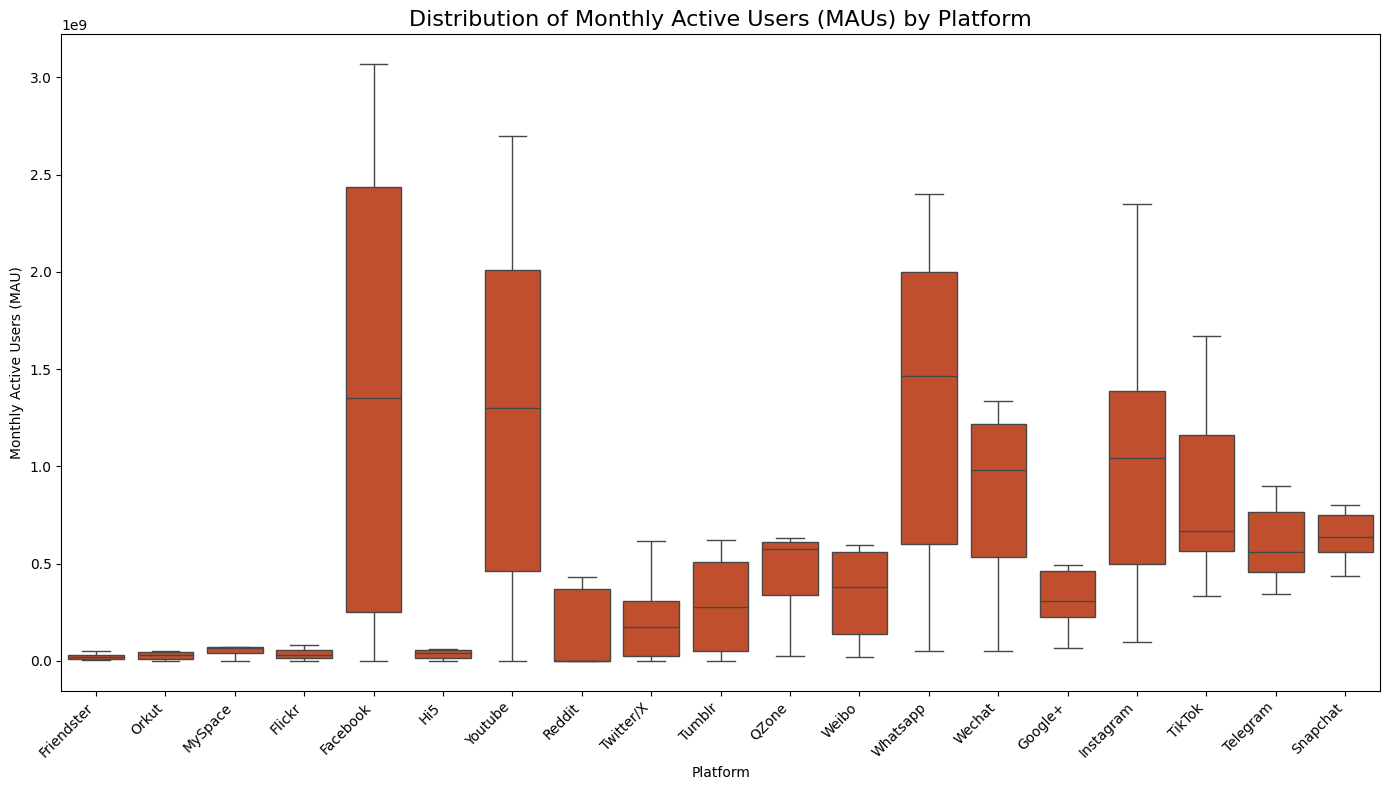

In [40]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=cleanedSocialMediaDf, x='platform', y='mau', color='#D84315')
plt.xticks(rotation=45, ha='right')
plt.title("Distribution of Monthly Active Users (MAUs) by Platform", fontsize=16)
plt.ylabel("Monthly Active Users (MAU)")
plt.xlabel("Platform")
plt.tight_layout()
plt.show()

- **Typical Usage (Medians)**: Platforms like **`Facebook`**, **`YouTube`**, and **`WhatsApp`** have significantly higher median MAUs, indicating they consistently attract large user bases.

- **High Variability**: Wide boxes and long whiskers (e.g., **`Facebook`**, **`YouTube`**) suggest large fluctuations in user numbers, possibly due to global reach and evolving usage trends.

- **Low Usage & Stability**: Older or niche platforms like **`Friendster`**, **`Orkut`**, and **`MySpace`** show very low and consistent MAU levels, with minimal variation—likely reflecting legacy or inactive status.

- **Emerging & Steady Performers**: Platforms such as **`Instagram`**, **`TikTok`**, **`Telegram`**, and **`Reddit`** exhibit moderate-to-high median MAUs with relatively consistent ranges, pointing to sustained and growing engagement.

- **Outliers & Extremes**: Some platforms display extreme upper whiskers (e.g., **`Facebook`**, **`YouTube`**), highlighting peak activity months or surges in user base.

### Total MAUs per Platform (Cumulative)
To identify the most dominant platforms in terms of cumulative reach, we computed the total MAUs per platform across all months.

In [41]:
cleanedSocialMediaDf.groupby('platform')['mau'].sum().sort_values(ascending=False)

platform
Facebook      357395002451
Youtube       302714816117
Whatsapp      212920688197
Instagram     149042261460
Wechat        142591073228
QZone          80108499736
TikTok         77847620744
Weibo          61181381340
Tumblr         42107006047
Telegram       40030378659
Twitter/X      31474907582
Snapchat       31472049724
Google+        27285862081
Reddit          9574373542
MySpace         5141611630
Flickr          3729001551
Hi5             3045461409
Orkut           2680737399
Friendster      1613534440
Name: mau, dtype: int64

This ranking highlights which platforms consistently attracted the largest audiences, offering context for how platform dominance may influence or align with trends in the movie industry.

### How have social media platform growth trends changed over time?
To understand how the popularity of social media platforms has evolved, we analyzed monthly active user (MAU) data from 2004 onwards. Each platform’s growth was tracked using the number of users over time, allowing us to visualize their rise or decline in popularity.

This helps reveal the following:
- When each platform peaked in user count
- Periods of rapid growth or decline
- Shifts in dominance between platforms (e.g., **`Facebook`** surpassing **`MySpace`**)

By plotting MAU trends per platform over the years, we gain insight into how user preferences have evolved in the digital landscape.

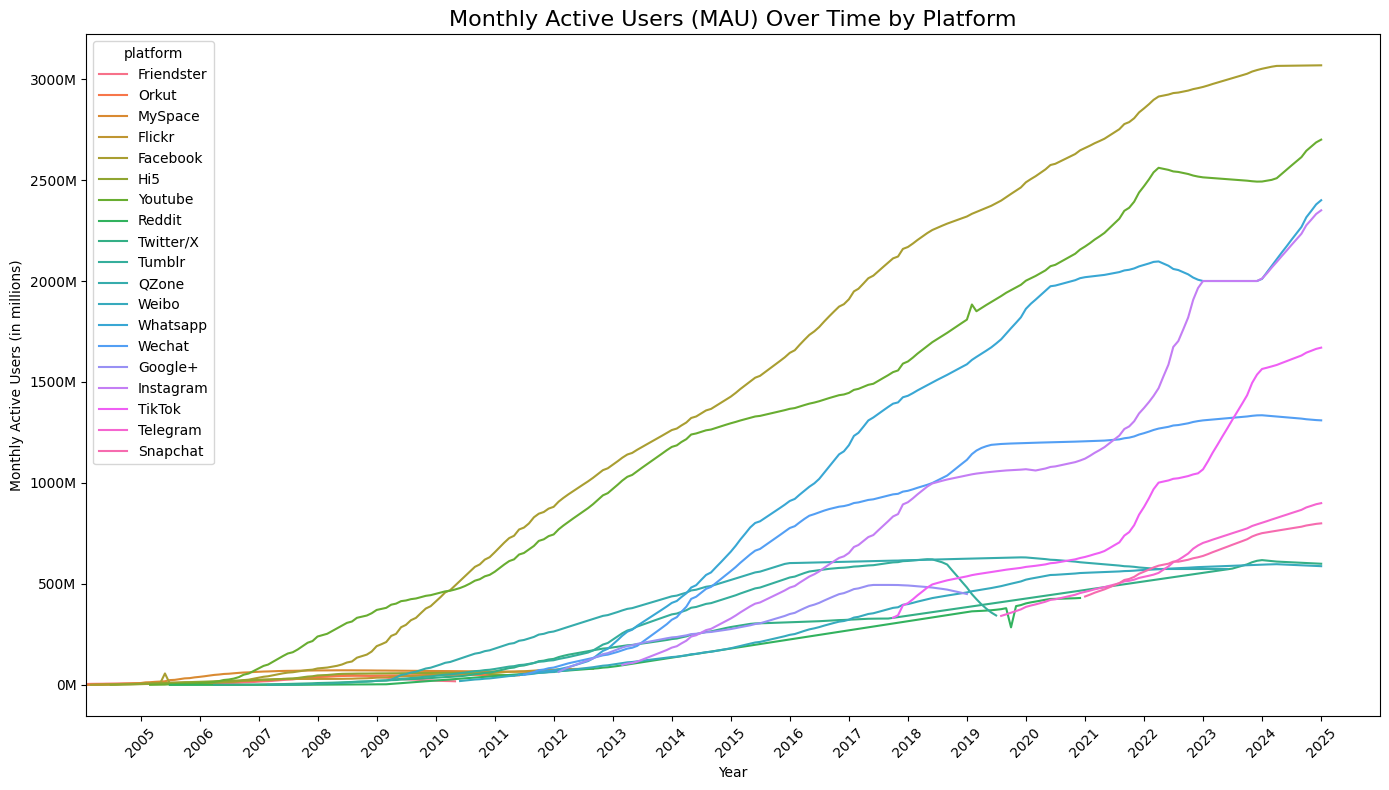

In [42]:
plt.figure(figsize=(14, 8))

plot_df = cleanedSocialMediaDf.copy()
plot_df = plot_df[plot_df['year_month'].dt.year <= 2025]
plot_df['mau_millions'] = plot_df['mau'] / 1_000_000

sns.lineplot(data=plot_df, x='year_month', y='mau_millions', hue='platform')
plt.title("Monthly Active Users (MAU) Over Time by Platform", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Monthly Active Users (in millions)")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}M'))
plt.xlim([cleanedSocialMediaDf['year_month'].min(), pd.Timestamp('2025-12-31')])
plt.tight_layout()
plt.show()

- **`Facebook`** and **`YouTube`** show sustained, long-term growth, each surpassing 2–3 billion users by 2025.

- **`MySpace`**, **`Orkut`**, and **`Friendster`** peaked early and experienced sharp declines, reflecting their fall from relevance.

- **`Instagram`**, **`WhatsApp`**, and **`Snapchat`** demonstrate strong and steady growth, maintaining high user engagement over the years.

- **`TikTok`** and **`Telegram`** show rapid acceleration in user growth post-2019, signaling a shift toward newer platforms.

- **`Google+`** showed moderate growth before flattening and eventually disappearing from the trendline—consistent with its shutdown.

## 🎬 Movies Dataset EDA

### What does the distribution of the movies in the dataset throughout the years looks like?
Keeping in mind the nature of the TMDB Dataset, we must look at the historical significance and disparity of not having the online platform before a certain era. 

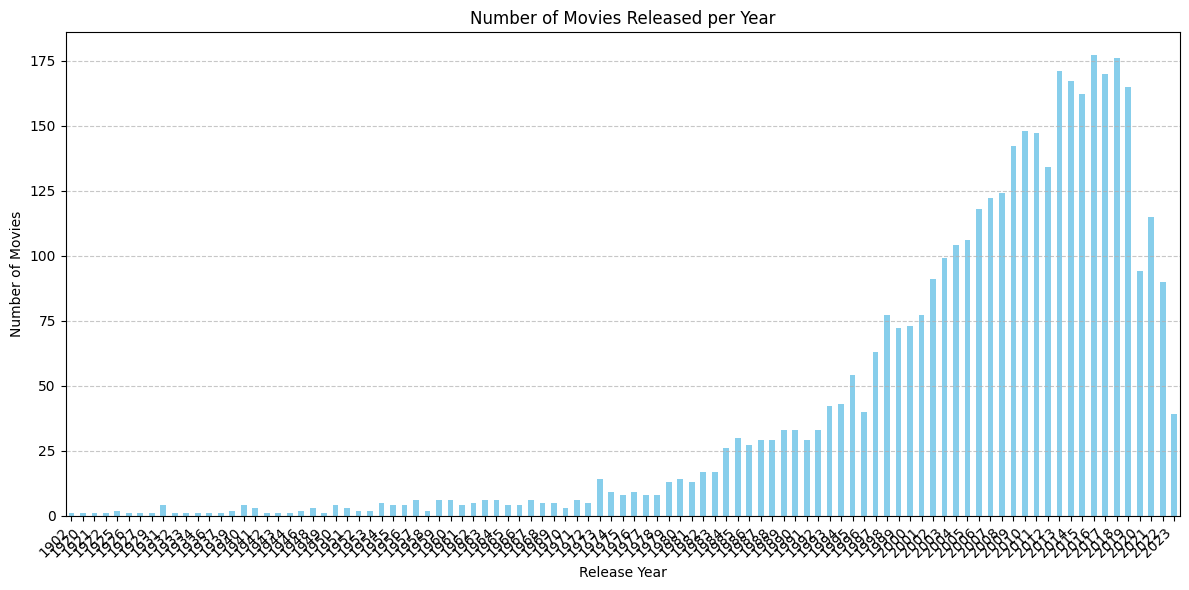

In [43]:
# Extract year into a new column
cleanedMoviesDf['release_year'] = cleanedMoviesDf['release_date'].dt.year

# Count movies per year
movies_per_year = cleanedMoviesDf['release_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Reframing Based on Movie Distribution

Upon inspecting the temporal distribution of movies in the dataset, a **heavily right-skewed pattern** becomes evident. This skew indicates a concentration of movies from more recent years — an expected outcome given the user-driven nature of **The Movie Database (TMDB)**, where contemporary films are more frequently rated and documented.

To align the dataset with both the **research objectives** and the **distributional reality** of the data, the researchers made a conscious decision to **focus on mainstream films from 1990 onwards**. This decision serves a dual purpose:

- **Provides a 14-year pre-social media context** (1990–2003), offering a baseline for comparing film trends before and after the emergence of platforms like Facebook (2004) and YouTube (2005).
- **Captures the modern cinematic era**, where globalized distribution, franchise-building, and accessible digital engagement reshaped how movies are produced, consumed, and rated.

By anchoring the analysis in this timeframe, the study ensures both **historical depth** and **cultural relevance**, bridging the transition from the pre-social media to the social media-driven media landscape.


In [44]:
# Filter the DataFrame to keep only rows with release year >= 1990
cleanedMoviesDf = cleanedMoviesDf[cleanedMoviesDf['release_date'].dt.year >= 1990]

Let's now see the temporal distribution of movies given this reframed dataframe.

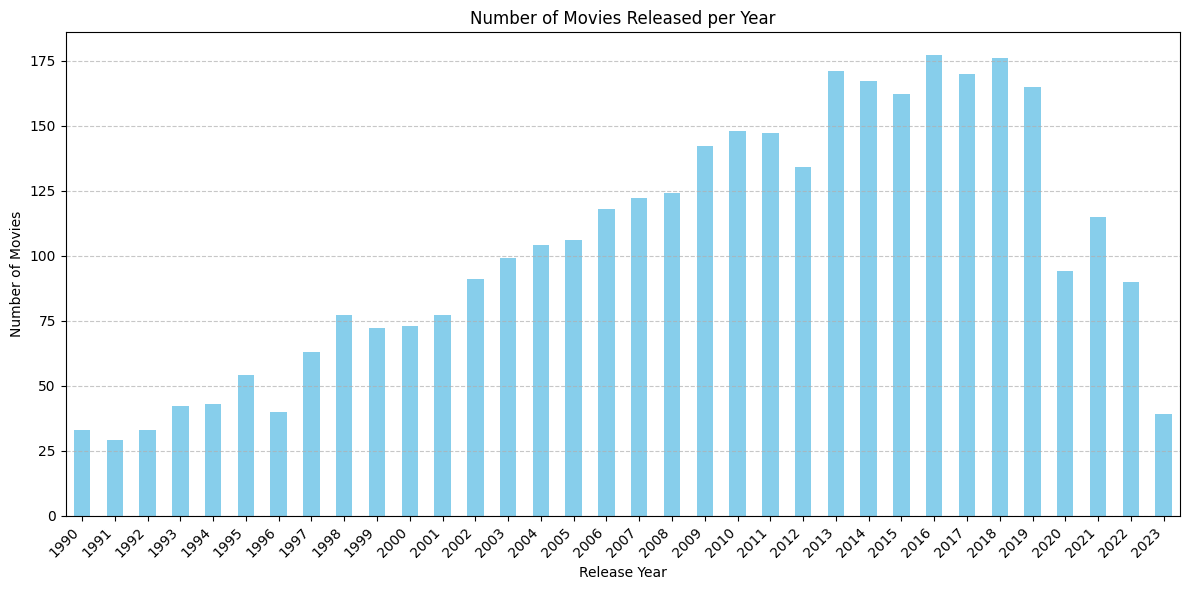

In [45]:
# Extract year into a new column
cleanedMoviesDf['release_year'] = cleanedMoviesDf['release_date'].dt.year

# Count movies per year
movies_per_year = cleanedMoviesDf['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### What are the year-by-year trends in movie industry metrics?
To explore how the movie industry has evolved over time, we examined four key metrics on a per-year basis:

- **Average Runtime** – How long movies typically are
- **Average Revenue** – The mean revenue movies earned
- **Total Vote Count** – The sum of audience votes, indicating engagement or popularity
- **Average Vote Rating** – The average audience rating, reflecting perceived quality

We grouped the data by release year and plotted each metric to observe overall trends, fluctuations, and potential outliers, such as during the pandemic. By visualizing these trends across the years in the dataset, we aim to understand how production, reception, and performance have changed throughout the history captured—whether consistent patterns, gradual shifts, or significant disruptions exist in the industry.

Notes:
- The statistics for movies from the 20th century appear skewed due to a filtering threshold. Only movies with at least 1,000 votes were included in the dataset. As a result, many older films were excluded, particularly lesser-known titles that no longer receive attention today.
- This filtering bias means that older films in the data tend to be well-known "classics," which are more likely to receive high ratings from viewers who still engage with them. Consequently, we observe higher average ratings in earlier years, despite lower overall vote counts.
- As total vote count increases across more recent years, average ratings tend to drop slightly. This may reflect a form of rating normalization, where a broader range of opinions balances out extreme ratings, converging toward the typical average of 6–7 seen in most movies today.

In [46]:
years = pd.to_datetime(cleanedMoviesDf['release_date'], format='%d/%m/%Y', errors='coerce').dt.year

filtered_df = cleanedMoviesDf[years.notna()].copy()
filtered_df['release_year'] = years[years.notna()].astype(int)

pivot_movies = filtered_df.groupby('release_year').agg({
  'runtime': 'mean',
  'revenue': 'mean',
  'vote_count': 'sum',
  'vote_average': 'mean'
}).reset_index()

#### Average Runtime

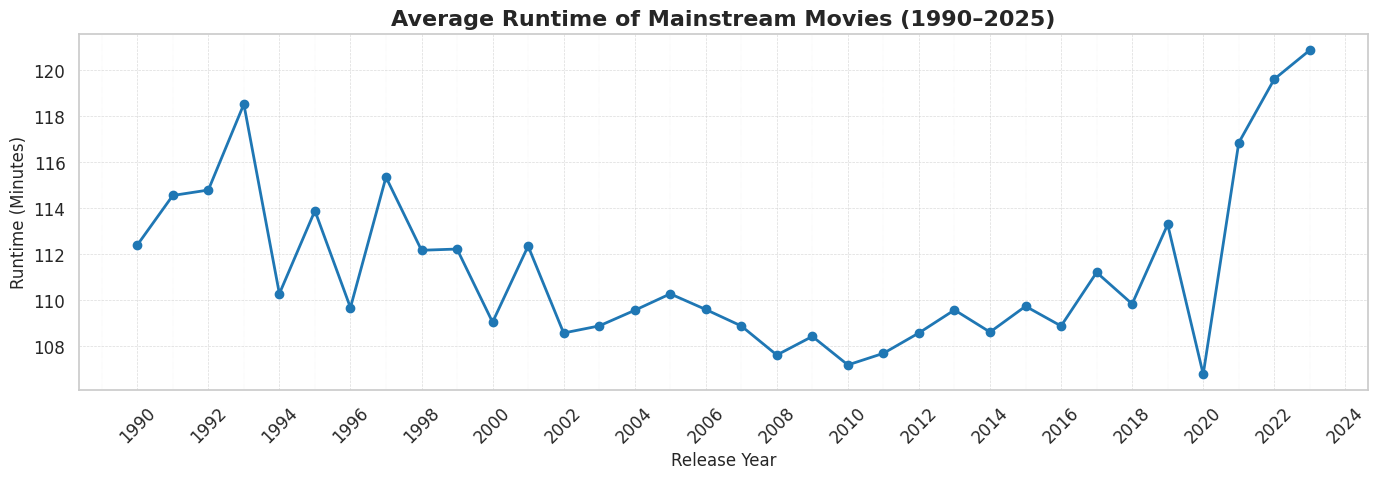

In [47]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

plt.figure(figsize=(14, 5))
plt.plot(pivot_movies['release_year'], pivot_movies['runtime'], marker='o', linewidth=2, color='#1f77b4')

plt.title("Average Runtime of Mainstream Movies (1990–2025)", fontsize=16, weight='bold')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Runtime (Minutes)", fontsize=12)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.grid(visible=True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)

plt.tight_layout()

We see here that throughout the 90's to 2000's, the average runtime of movies per year likely falls between and hour and 40 minutes to two hours. In recent years, there has been a modest upward trend, suggesting a rising preference for longer feature films.

#### Average Revenue

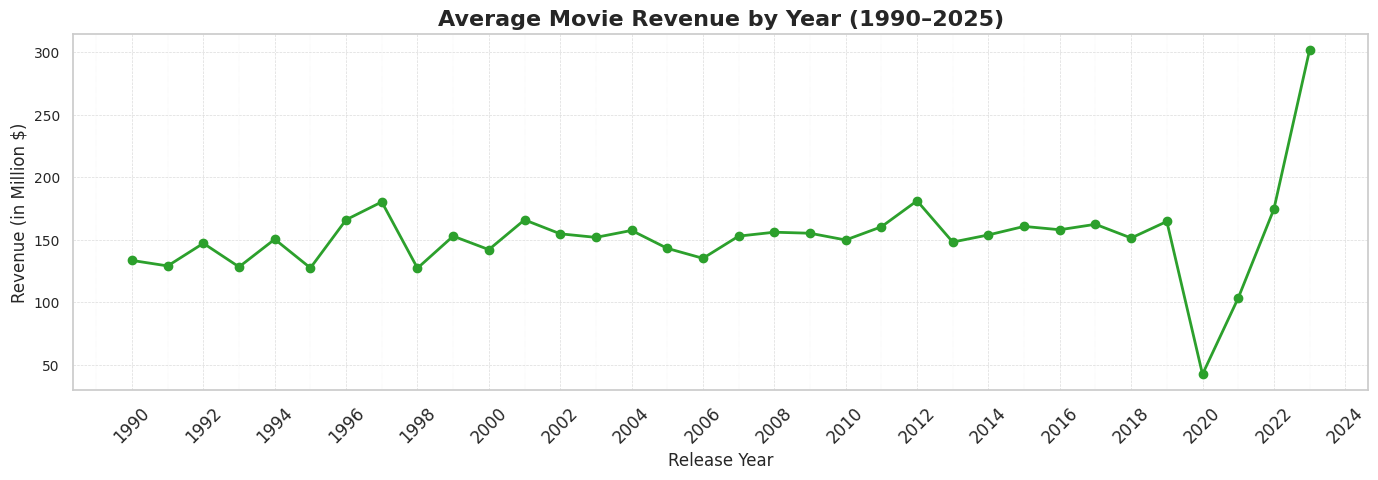

In [48]:
sns.set(style="whitegrid", palette="deep", font_scale=1.1)

# Convert revenue to millions (if not already)
pivot_movies['revenue_millions'] = pivot_movies['revenue'] / 1e6

plt.figure(figsize=(14, 5))
plt.plot(pivot_movies['release_year'], pivot_movies['revenue_millions'], 
         marker='o', linewidth=2, color='#2ca02c')  

plt.title("Average Movie Revenue by Year (1990–2025)", fontsize=16, weight='bold')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Revenue (in Million $)", fontsize=12)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.grid(visible=True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)

plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

Here, we see a stable trend of average revenue per year, up until 2020, where the average revenue dropped significantly, possibly due to CoViD-19. Ever since then, it has seen a rise, indicating a possible resurgence of cinema after widespread lockdowns.

#### Total Vote Count

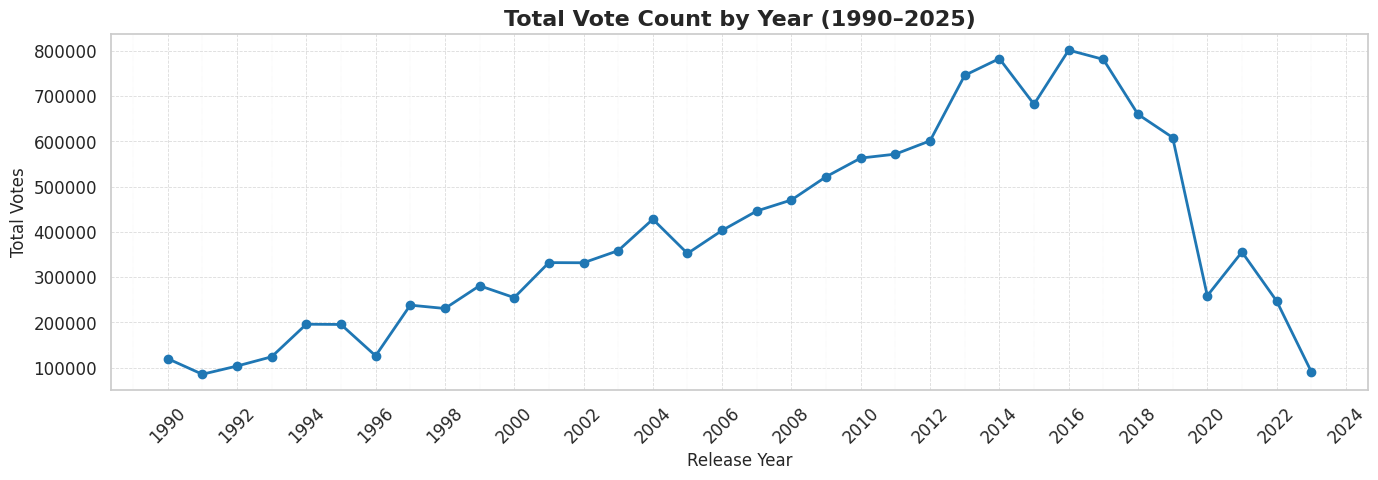

In [49]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

plt.figure(figsize=(14, 5))
plt.plot(pivot_movies['release_year'], pivot_movies['vote_count'],
         marker='o', linewidth=2, color='#1f77b4') 

plt.title("Total Vote Count by Year (1990–2025)", fontsize=16, weight='bold')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Total Votes", fontsize=12)

plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

plt.grid(visible=True, which='major', linestyle='--', linewidth=0.6, alpha=0.7)
plt.grid(visible=True, which='minor', linestyle=':', linewidth=0.3, alpha=0.5)

plt.tight_layout()
plt.show()

Here, we se a gradual rise in total votes per year. This sharp rise can implicate the expansion of the internet, online rating platforms, and increased global film consumption. At around 2020, a significant drop is noticeable, indicating a possible CoViD-19 effect on the industry.

#### Average Vote Rating

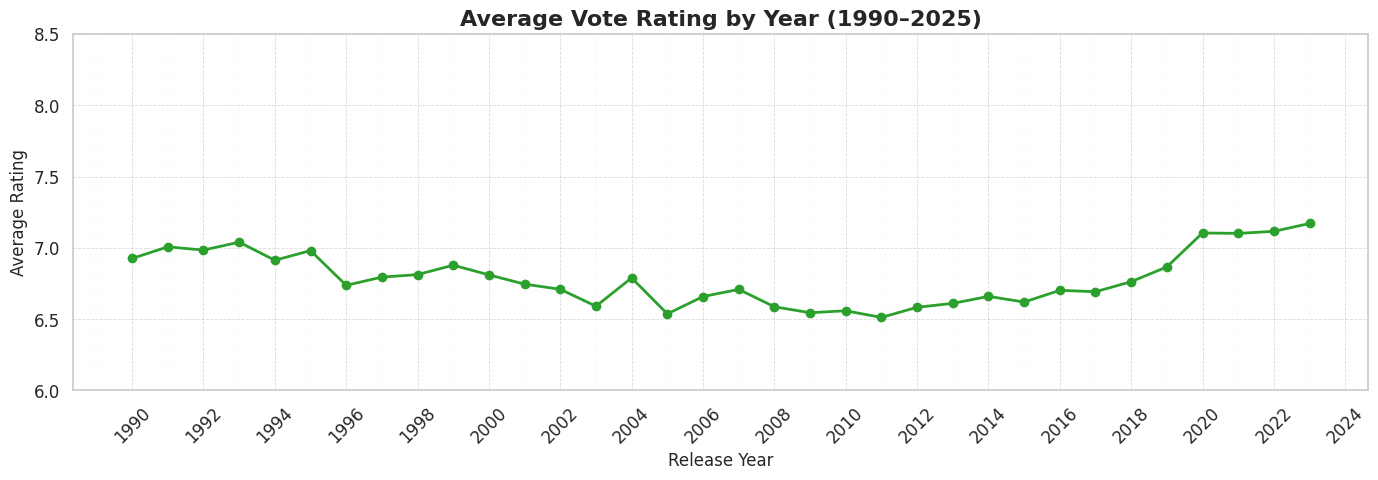

In [50]:
sns.set(style="whitegrid", palette="deep", font_scale=1.1)

plt.figure(figsize=(14, 5))
plt.plot(pivot_movies['release_year'], pivot_movies['vote_average'],
         marker='o', linewidth=2, color='#2ca02c') 

plt.title("Average Vote Rating by Year (1990–2025)", fontsize=16, weight='bold')
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)

plt.xticks(rotation=45)
plt.yticks(np.arange(6.0, 9.0, 0.5))  # more Y-axis ticks from 5.0 to 9.0
plt.gca().xaxis.set_major_locator(MultipleLocator(2))
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

plt.gca().yaxis.set_minor_locator(MultipleLocator(0.1))

plt.grid(visible=True, which='major', linestyle='--', linewidth=0.6, alpha=0.7)
plt.grid(visible=True, which='minor', linestyle=':', linewidth=0.3, alpha=0.4)

plt.tight_layout()
plt.show()

Here we see that the average rating for movies typically lie between 6.5 to 7.5. And although there is a decrease in movies released in 2020, its average rating actually rose, which could be an indicator for either a quality over quantity approach in film, or an effect of lesser movies in that year, leading to a less normalized average.

### How have movie industry metrics changed in the era of social media (2004–2023)?

To understand how the movie industry has evolved alongside the rise of social media, the researchers focused on data from 2004 to 2023—a period marked by the emergence and growth of platforms like **`YouTube`**, **`Facebook`**, **`Instagram`**, and **`TikTok`**.

The researchers visualized trends within this modern, digitally connected era. This time frame allows us to examine whether increased access to short-form content and online engagement has influenced how movies are produced, received, and consumed. By comparing this focused view with the broader timeline, we aim to identify shifts potentially driven by evolving viewer preferences, digital marketing strategies, or broader changes in attention economy.

In [51]:
valid_mask = years.notna() & (years >= 2004)
filtered_df = cleanedMoviesDf[valid_mask].copy()
filtered_df['release_year'] = years[valid_mask].astype(int)

pivot_movies = filtered_df.groupby('release_year').agg({
    'runtime': 'mean',
    'revenue': 'mean',
    'vote_count': 'sum',
    'vote_average': 'mean'
}).reset_index()

### Is shorter movie runtime linked to the rise of short-form content?

To explore whether the popularity of short-form content (e.g., **`TikTok`**, **`Instagram Reels`**, **`YouTube Shorts`**) has influenced movie production, we visualized the **runtime of movies released from 2004 to 2023**—the era dominated by social media.

The scatterplot below shows individual movie runtimes plotted against their release year, with a trend line fitted to capture any overarching trajectory.

This analysis helps us observe:
- If there's a downward shift in runtime as attention spans shorten
- Whether runtimes are more variable in the social media era
- Any clear patterns that may correlate with the growth of short-form platforms

By combining both the raw scatter and regression line, we aim to understand whether storytelling in cinema has adapted to modern content consumption habits.

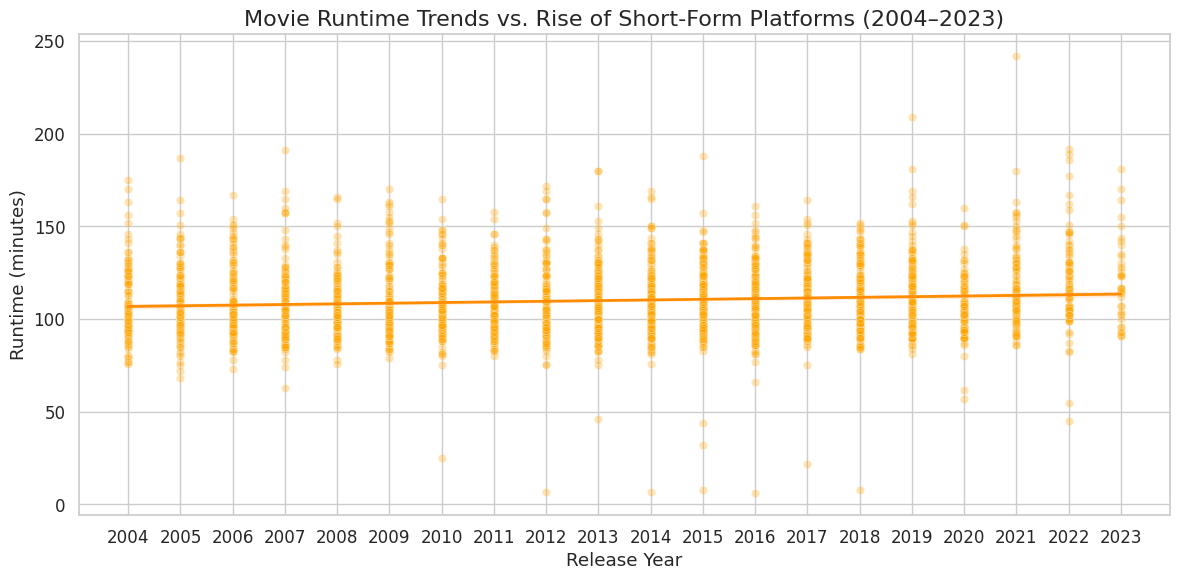

In [52]:
years = pd.to_datetime(cleanedMoviesDf['release_date'], format='%d/%m/%Y', errors='coerce').dt.year
filtered_df = cleanedMoviesDf[years.notna()].copy()
filtered_df['release_year'] = years[years.notna()].astype(int)

# Filter from 2004 onwards (when social media began rising)
filtered_df = filtered_df[filtered_df['release_year'] >= 2004]

plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_df, x='release_year', y='runtime', alpha=0.3, color='#FFA500')  # Pretty orange
sns.regplot(data=filtered_df, x='release_year', y='runtime', scatter=False, color='darkorange', line_kws={'linewidth': 2})

plt.title('Movie Runtime Trends vs. Rise of Short-Form Platforms (2004–2023)', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Runtime (minutes)')
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x)}'))

plt.tight_layout()
plt.show()

- **Average runtimes remain stable**: Despite the surge in short-form content, the trend line indicates that movie runtimes have stayed relatively flat from 2004 to 2023.

- **Wide variability continues**: Movie runtimes consistently range from under 60 minutes to over 180 minutes across all years, showing no dramatic compression in length.

- **No clear downward trend**: The regression line does not show a significant decrease in average runtime, suggesting that mainstream cinema has not shortened in response to shorter online content.

- **Outliers exist but are rare**: Extremely short or long movies appear sporadically throughout the timeline, indicating they are exceptions rather than emerging norms.

While short-form platforms have reshaped online content consumption, traditional movie runtimes have remained largely unaffected, reflecting a continued appetite for long-form storytelling in cinema.

### How are key movie industry metrics related to one another?

To better understand trends within the movie industry (2004–2025), we explored correlations between key production and performance indicators:

- 🎞️ Runtime  
- 💰 Budget  
- 💸 Revenue  
- ⭐ Average Rating  
- 🗳️ Total Votes  
- 📈 Popularity (as tracked by TMDb)

This correlation plot helps us observe whether movies that are longer tend to be better rated, or whether higher budgets lead to more revenue. It also offers insight into how audience engagement and industry investment might be interrelated—key patterns to consider when examining shifts in the movie landscape during the rise of short-form content and changing viewer habits.

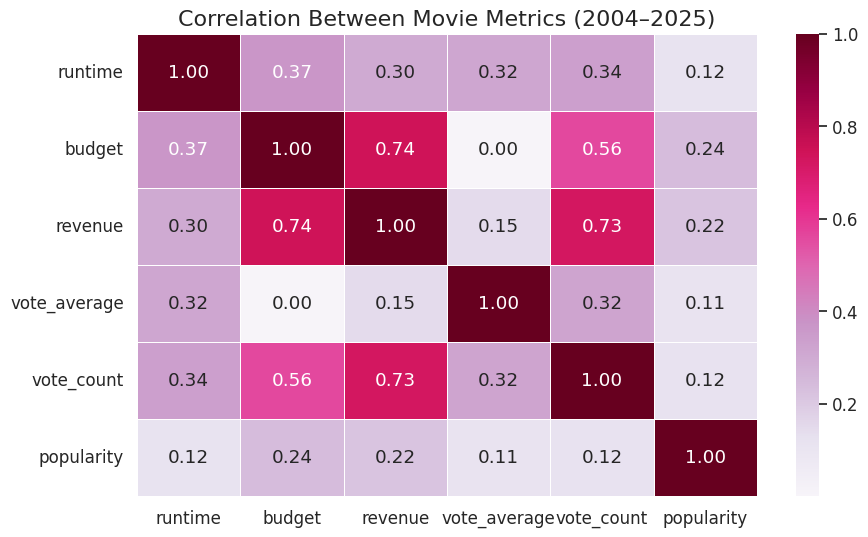

In [53]:
years = pd.to_datetime(cleanedMoviesDf['release_date'], format='%d/%m/%Y', errors='coerce').dt.year
filtered_movies = cleanedMoviesDf[(years >= 2004) & (years <= 2025)].copy()

# Prepare correlation matrix
corr_columns = ['runtime', 'budget', 'revenue', 'vote_average', 'vote_count', 'popularity']
corr_matrix = filtered_movies[corr_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='PuRd', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Movie Metrics (2004–2025)", fontsize=16)
plt.show()

This heatmap explores how different movie metrics relate to one another from 2004 to 2025. Values closer to 1 indicate a strong positive correlation (they increase together), while values near 0 suggest little to no relationship.

- One of the strongest relationships observed is between **budget** and **revenue** (0.74). Generally, this means that movies with larger budgets tend to earn more at the box office. Similarly, **revenue** and **vote count** also show a high correlation (0.73), suggesting that movies making more money often receive more audience votes.

- There’s a moderate connection **between budget** and **vote count** (0.56), implying that higher-budget films are more likely to gain attention and be rated by viewers. However, **budget** has no correlation with **vote average** (0.00), indicating that spending more doesn’t necessarily result in higher audience satisfaction or better ratings.

- Interestingly, **vote count** and **vote average** show a mild positive correlation (0.32). Contrary to what one might assume, this means that movies with more votes don’t receive worse ratings; they actually tend to be rated slightly higher on average.

- **Popularity**, despite being a notable metric, shows only weak correlations with other factors like **budget**, **revenue**, and **vote count**. This suggests that its calculation may be influenced by separate factors such as trends or social media activity.

- Lastly, **runtime** exhibits only weak correlations across all metrics. While slightly positively correlated with **budget** and **vote count**, it doesn’t appear to be a strong predictor of any major outcome like **revenue** or **popularity**.

## Post-EDA Research Questions

After conducting EDA on Movies and Social Media metrics, there is no apparent or obvious trend that correlates social media with movies yet. This prompts the researchers to dig deeper and look to other variables such as tagline, genres and keywords. Since this would involve some sort of Natural Language Processing, the researchers would need to go beyond the previously discussed modules as of June 23, 2025.

## Preparation for Text Modelling

In [54]:
import string
import re

### Tagline

Catchphrase or memorable line associated with the movie. (type: str)

The tagline provides a short description about the movie, influencing the movie's perception or appeal. In this analysis, we will be using corpus analysis to examine the patterns, frequency, and context of words used in the tagline column, revealing themes or trends across multiple movies.

In [55]:
# i made  copy if that okay or i could just used the cleaned one
taglineMoviesDf = cleanedMoviesDf.copy()

# Cleans the tagline by removing punctation, loweing cases, and splitting words by whitespaces
def clean_and_split_tagline(text):

    text = re.sub(f"[{string.punctuation}]", "", text)  
 
    text = text.lower()
    
    words = text.split()  
    
    return words

# Apply the cleaning and splitting function to the 'tagline' column
taglineMoviesDf['tagline_words'] = taglineMoviesDf['tagline'].apply(clean_and_split_tagline)

# Flatten the taglines by going into sublist then word takes them each out then goes into all_words
all_words = [word for sublist in taglineMoviesDf['tagline_words'] for word in sublist]

# Convert it to a DataFrame for easier analysis (optional)
all_words_df = pd.DataFrame(all_words, columns=['word'])

# View the first few words
print(all_words_df)

         word
0        your
1        mind
2          is
3         the
4       scene
...       ...
22256    turn
22257     the
22258    town
22259  upside
22260    down

[22261 rows x 1 columns]


### Genres

List of genres the movie belongs to. (type: str)

In this corpus analysis, we plan to focus on breaking down each genre into individual words, examining their frequency and relationships to identify similar themes, trends, or associations within different movie genres.

In [56]:
genresMoviesDf = cleanedMoviesDf.copy()

# Function to clean, split into words, and remove punctuation
def clean_and_split_words(text):
   
    genres = text.split(',')
    
    words = []

    for genre in genres:
        # Remove punctuation using regex and string.punctuation
        genre = re.sub(f"[{string.punctuation}]", "", genre)  
        # Split into words and add to the list
        words.extend(genre.strip().split())  
    
    # Return the list of words for this row
    return words

# Apply the cleaning and splitting function to the 'genres' column
genresMoviesDf['genres_words'] = genresMoviesDf['genres'].apply(clean_and_split_words)

print(genresMoviesDf[['genres', 'genres_words']])

                                           genres  \
0              Action, Science Fiction, Adventure   
1               Adventure, Drama, Science Fiction   
2                  Drama, Action, Crime, Thriller   
3     Action, Adventure, Fantasy, Science Fiction   
4              Science Fiction, Action, Adventure   
...                                           ...   
3934                       Crime, Thriller, Drama   
3936              Action, Science Fiction, Horror   
3937                                Comedy, Drama   
3938                         Comedy, Drama, Crime   
3939                               Comedy, Family   

                                        genres_words  
0              [Action, Science, Fiction, Adventure]  
1               [Adventure, Drama, Science, Fiction]  
2                   [Drama, Action, Crime, Thriller]  
3     [Action, Adventure, Fantasy, Science, Fiction]  
4              [Science, Fiction, Action, Adventure]  
...                              

### Keywords

Keywords associated with the movie (type: str).

We plan on examining the individual words from the keywords column to uncover patterns or trends across movies

In [57]:
# Same implementation with tagline

keywordsMoviesDf = cleanedMoviesDf.copy()

# Function to clean and split the 'keywords' column
def clean_and_split_keywords(text):

    text = re.sub(f"[{string.punctuation}]", "", text)  
    
    text = text.lower()
    
    words = text.split()  
    
    return words

# Apply the cleaning and splitting function to the 'keywords' column
keywordsMoviesDf['keywords_words'] = keywordsMoviesDf['keywords'].apply(clean_and_split_keywords)

# Flatten the 'keywords_words' by going into sublists and extracting each word
all_words = [word for sublist in keywordsMoviesDf['keywords_words'] for word in sublist]

# Convert it to a DataFrame for easier analysis (optional)
all_words_df = pd.DataFrame(all_words, columns=['separate_keword'])

print(all_words_df)

      separate_keword
0              rescue
1             mission
2               dream
3            airplane
4               paris
...               ...
67750       christmas
67751           party
67752       christmas
67753            tree
67754       christmas

[67755 rows x 1 columns]


# 💗 Acknowledgements

Statement: During the preparation of this work the author(s) used [ChatGPT-4o] for the following purposes:

**Writing, Formatting, and Code Assistance**  
Portions of this notebook — including the **abstract, dataset descriptions, exploratory commentary, and Python code** — was enhanced using **ChatGPT (GPT-4o)**, developed by **OpenAI**.  All outputs, especially code implementations, were **manually reviewed and validated** by the researchers to ensure correctness and contextual alignment.

**Logo Support**  
The **Statisteros Modeleros** logo was created with design guidance from **ChatGPT’s image generation capabilities**, powered by **OpenAI’s generative tools**.

After using this tool/service, the authors reviewed and edited the content as needed and takes full responsibility for the content of the publication.

- 🧰 **Tool Stack**  
  - [Deepnote](https://deepnote.com/) for interactive, collaborative Python notebook development  
  - [GitHub](https://github.com/) for version control, dataset versioning, and project hosting  
  - [OpenAI ChatGPT (GPT-4o)](https://openai.com/chatgpt) for writing, coding, and ideation support
  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ae7c9fb5-985c-4336-9e5a-4c1cceee0157' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>